In [29]:
import os, subprocess, glob

import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

import matplotlib.cm as cm
%matplotlib inline


In [4]:
# not using this class for anything but it's a reference for refining the 3D image.

class Img2D:
    
    def __init__(self, n, r, k):
        self.n = n
        self.r = r
        self.k = k
        self.arr, self.centers = self.gen_2d_points(n, r, k)

    def gen_2d_points(self, n, r, k):
        """
        n = dim of the image.
        r = max radius of point.
        k = num of random points.
        all params >= 1.
        """
        arr = np.ones((n, n))
        centers = []
        while k > 0:
            a = np.random.randint(0, n)
            b = np.random.randint(0, n)
            centers += [(a, b)]
            r1 = np.random.randint(r//2 + 1, r)
            # (a, b) is center of point, r1 is radius for point. 

            y, x = np.ogrid[-a:n-a, -b:n-b]
            mask = x*x + y*y <= r1*r1
            arr[mask] = 255
            k -= 1
        return arr, centers
    
    def get_img(self):
        # not filtered array
        return self.arr
    
    def show_img(self):
        img_filtered = ndimage.gaussian_filter(self.arr, sigma=7, order=0)
        plt.imshow(img_filtered, cmap='gray', interpolation='nearest');
        
    def get_centers(self):
        return self.centers
    
    def plt_x_section(self):
        img_filtered = ndimage.gaussian_filter(self.arr, sigma=7, order=0)
        x, y = self.centers[0]
        start = -1
        end = -1
        prev = -1
        prev = 100
        for i in range(0, 500):
            curr = img_filtered[x][i]
            if start == -1 and prev == 1.0 and curr != 1.0:
                start = i
            elif start != -1 and end == -1 and prev != 1.0 and curr == 1.0:
                end = i
                break
            prev = curr
        plt.plot(img_filtered[x][start:end])
        plt.show()


In [42]:
class Img3D:
    
    def __init__(self, n, r, k):
        self.n = n
        self.r = r
        self.k = k
        self.img_unfiltered, self.centers = self.gen_3d_points()
        # Might need to change sigma based on n.
        self.img_filtered = ndimage.gaussian_filter(self.img_unfiltered, sigma=7, order=0)
        
    def gen_3d_points(self):
        """
        n = dim of the image.
        r = max radius of point.
        k = num of random points.
        all params >= 1.
        """
        arr = np.zeros((self.n, self.n, self.n))
        centers = []
        for _ in range(self.k):
            a = np.random.randint(self.n//4, 3*self.n//4)
            b = np.random.randint(self.n//4, 3*self.n//4)
            # c = np.random.randint(self.n//4, 3*self.n//4)
            c = n//2
            centers += [(a, b, c)]
            r1 = np.random.randint(self.r//2, self.r)
            z, y, x = np.ogrid[-a:self.n-a, -b:self.n-b, -c:self.n-c]
            mask = x*x + y*y + z*z <= r1*r1
            arr[mask] = 255
        return arr, centers

    def show_img(self, filter_flag):
        if filter_flag == 0:
            plt.imshow(self.img_unfiltered[self.centers[0][0]], cmap='gray', interpolation='nearest');
        elif filter_flag == 1:
            plt.imshow(self.img_filtered[:,self.centers[0][0],:,:], cmap='gray', interpolation='nearest');
  

In [43]:
img = Img3D(100, 20, 1)
# (a, b, c)
# a -> z axis
# b -> 

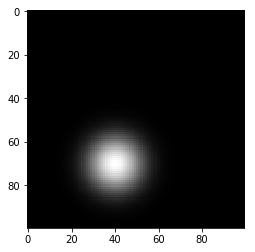

In [47]:
plt.imshow(img.img_filtered[img.centers[0][0],:,:], cmap='gray', interpolation='nearest');


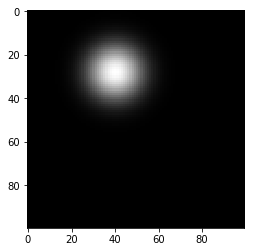

In [49]:
plt.imshow(img.img_filtered[:,img.centers[0][1],:], cmap='gray', interpolation='nearest');


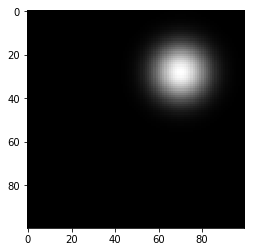

In [50]:
plt.imshow(img.img_filtered[:,:,img.centers[0][2]], cmap='gray', interpolation='nearest');

In [ ]:
self.img_filtered[self.centers[0][0],:,:] # xy plane

self.img_filtered[:,self.centers[0][1],:,:] # xz plane

self.img_filtered[:,:,self.centers[0][2]] # yz plane